In [1]:
import numpy as np
from matplotlib import pyplot as plt

We start with a binary tree that has $d$ levels, and therefore $n_{\max} = 2^{d-1}$ leaves. Of those leaves, we draw $n < n_{\max}$ without replacement. Then, we mark all nodes from the root to the drawn leaves. The main questions are:
1. What is the expected number of nodes marked after drawing $n$ leaves?
2. What is the variance of the number of marked nodes?
We will first answer (1). To that end, assume for a moment that we draw the leaves *with* replacement, i.e., it is possible to draw the same leave twice. Then, the probability of a node on level $i$ being marked after drawing $n$ leaves is
$$
1 - \left(1 - \frac{1}{2^i}\right)^n.
$$
Let $M_n$ denote the random variable describing the number of marked nodes after $n$ drawings with replacement. Then,
$$
\mathbb E(M_n) = \sum\limits_{i=1}^{d-1}2^i \left(1 - \left(1 - \frac{1}{2^i}\right)^n \right).
$$
If we plot this number as a function of $n \leq n_{\max}=2^{20}$, we see that even after drawing $n=n_{\max}$ leaves, there are some unmarked nodes (note that $2n_{\max}-1$ is the number of nodes in our binary tree):

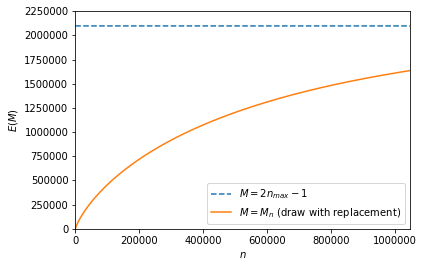

In [2]:
def num_nodes_with_replacement(depth, n):
    ret = 0
    for i in range(1, depth):
        #ret -= 2**i * np.exp(-n / (2**i - 1.))
        ret += 2**i * (1 - (1 - 2**(-i))**n)
    return ret

d = 21
n_max = 2**(d-1)
n_range = np.arange(1, n_max, 10)
plt.plot(n_range, [2*n_max-1]*len(n_range), "--", label="$M = 2n_{max}-1$")
plt.plot(n_range, num_nodes_with_replacement(d, n_range), label="$M = M_n$ (draw with replacement)")
plt.ylim(0,2**(d + .1))
plt.xlim(0,2**(d-1))
plt.xlabel("$n$")
plt.ylabel("$E(M)$")
plt.legend(loc=4)
plt.show()

Now, Let $M'_n$ be the random variable for the number of marked nodes after drawing $n$ leaves *without* replacement.
To get an idea of its expectation, we can ask the question "How many times do I need to draw *with* replacement to get $n$ distinct leaves?". Let $N_k$ be the random variable returning the number of distinct leaves after drawing $k$ times with replacement. Then
$$
\mathbb E(N_k) = n_{\max}\left(1-\left(1-\frac{1}{n_{\max}}\right)^k\right).
$$
Solving for $k$ yields
$$
k = \frac{\log\left(1 - \frac{\mathbb E(N_k)}{n_{\max}}\right)}{\log\left(1 - \frac{1}{n_{\max}}\right)}
$$
If we fix $\mathbb E(N_k)$ to $n$, then $k$ is the number of of times we need to draw with replacement to get an expected $n$ distinct leaves. Without knowing whether this is actually correct stochastics, we now use $\mathbb E(M_k)$ as an approximation of $\mathbb E(M'_n)$.

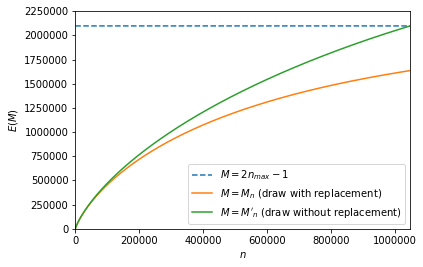

In [3]:
def num_nodes_without_replacement(depth, n):
    k = np.log(1.-n/2.**(depth - 1)) / np.log(1. - 1./2.**(depth - 1))
    return num_nodes_with_replacement(depth, k)


plt.plot(n_range, [2*n_max-1]*len(n_range), "--", label="$M = 2n_{max}-1$")
plt.plot(n_range, num_nodes_with_replacement(d, n_range), label="$M = M_n$ (draw with replacement)")
plt.plot(n_range, num_nodes_without_replacement(d, n_range), label="$M = M'_n$ (draw without replacement)")
plt.ylim(0,2**(d + .1))
plt.xlim(0,2**(d-1))
plt.xlabel("$n$")
plt.ylabel("$E(M)$")
plt.legend(loc=4)
plt.show()